In [17]:
from google.colab import files
import pandas as pd
import io
import unicodedata

# Função para importar CSV
def importar_csv():
    uploaded = files.upload()
    for nome_arquivo in uploaded.keys():
        csv_data = io.StringIO(uploaded[nome_arquivo].decode('utf-8'))
        df = pd.read_csv(csv_data)
        df.rename(columns={
            'date': 'Data',
            'Categoria': 'Categoria',
            'amount': 'amount'
        }, inplace=True)
        df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
        if 'Identificador' in df.columns:
                df.drop(columns=['Identificador'], inplace=True)
        return df

df = importar_csv()
display(df.head())
def normalize_column(df, col):
    df[col] = df[col].apply(lambda x: unicodedata.normalize('NFKC', str(x)))
    return df
df.dropna(subset=['amount'], inplace=True)  # Remove valores inválidos


Saving extrato_categorizados_final.csv to extrato_categorizados_final (6).csv


,Data,title,amount,Categoria
0,2025-06-11,Uber* Trip,9.74,Transporte
1,2025-06-10,99app *99app,12.40,Transporte
2,2025-06-09,Uber Uber *Trip Help.U,31.42,Transporte
3,2025-06-08,Uber* Trip,8.46,Transporte
4,2025-06-08,Uber Uber *Trip Help.U,15.22,Transporte


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

graphs_dir = 'graphs'
os.makedirs(graphs_dir, exist_ok=True)

plt.rcParams['font.family'] = 'DejaVu Sans'
def generate_financial_graphs(df: pd.DataFrame, graph_type: str, column_name: str, output_filename: str, title: str):
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
    df.dropna(subset=['amount'], inplace=True)
    expenses = df[df['amount'] < 0]

    plt.figure(figsize=(10, 7))

    if graph_type == 'pie':
        data = expenses.groupby(column_name)['amount'].sum().abs()
        if not data.empty:
            plt.pie(data,
                    labels=data.index,
                    autopct='%1.1f%%',
                    startangle=140,
                    wedgeprops={'edgecolor': 'black'},
                    pctdistance=0.85, # Distância das porcentagens
                    labeldistance=1.1) # Distância dos rótulos das categorias
            plt.axis('equal')
        else:
            plt.text(0.5, 0.5, "Sem despesas para exibir", ha='center', va='center', transform=plt.gca().transAxes)
            plt.axis('off')

    elif graph_type == 'bar':
        data = expenses.groupby(column_name)['amount'].sum().abs().sort_values(ascending=False)
        if not data.empty:
            sns.barplot(x=data.index, y=data.values, palette='viridis')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel('Valor (R$)')
            plt.xlabel(column_name)
        else:
            plt.text(0.5, 0.5, "Sem despesas para exibir", ha='center', va='center', transform=plt.gca().transAxes)
            plt.axis('off')

    else:
        return "Tipo de gráfico não suportado. Use 'pie' ou 'bar'."

    plt.title(title, pad=20)
    filepath = os.path.join(graphs_dir, output_filename)
    plt.tight_layout()
    # Usar bbox_inches='tight' para garantir que tudo se encaixe
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.close()
    return f"Gráfico salvo em: {filepath}"

In [19]:
# Gráfico de Pizza por Categoria de Gasto
print(generate_financial_graphs(
    df,
    graph_type='pie',
    column_name='Categoria',
    output_filename='gastos_por_categoria.png',
    title='Distribuição de Gastos por Categoria'
))

# Gráfico de Barras por Categoria de Gasto
print(generate_financial_graphs(
    df,
    graph_type='bar',
    column_name='Categoria',
    output_filename='despesas_categoria.png',
    title='Despesas por Categoria'
))


Gráfico salvo em: graphs/gastos_por_categoria.png
Gráfico salvo em: graphs/despesas_categoria.png


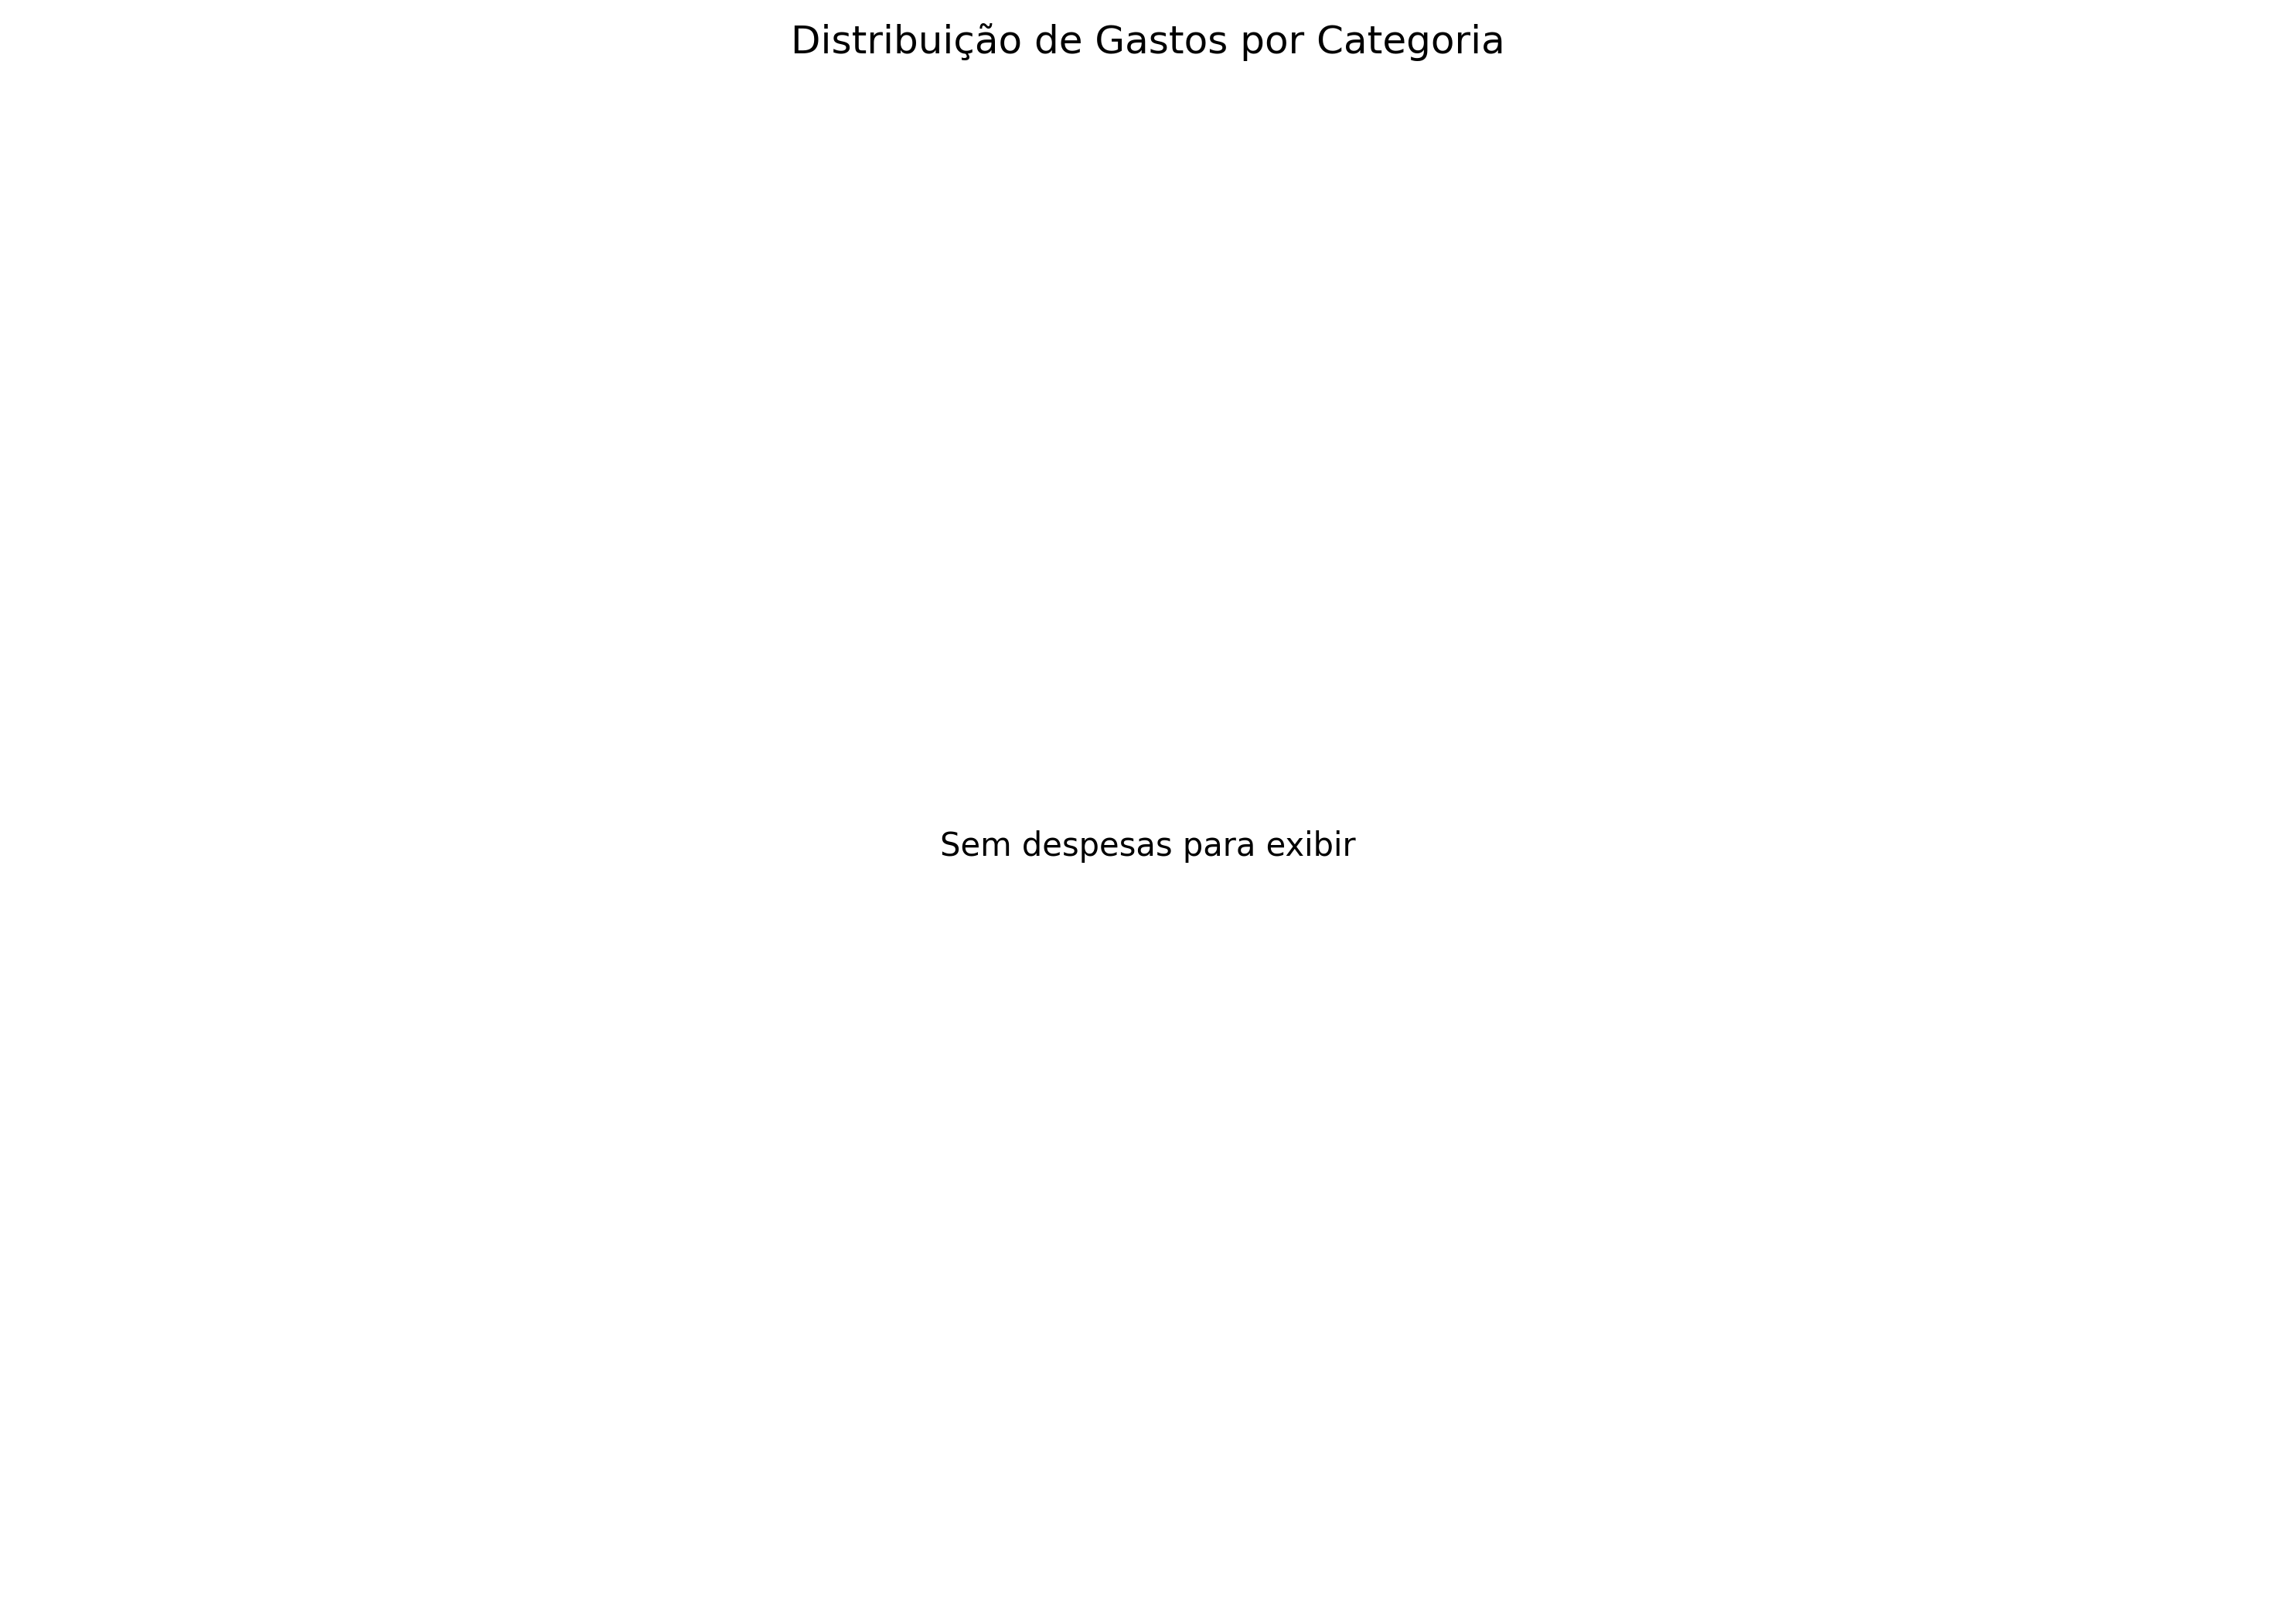

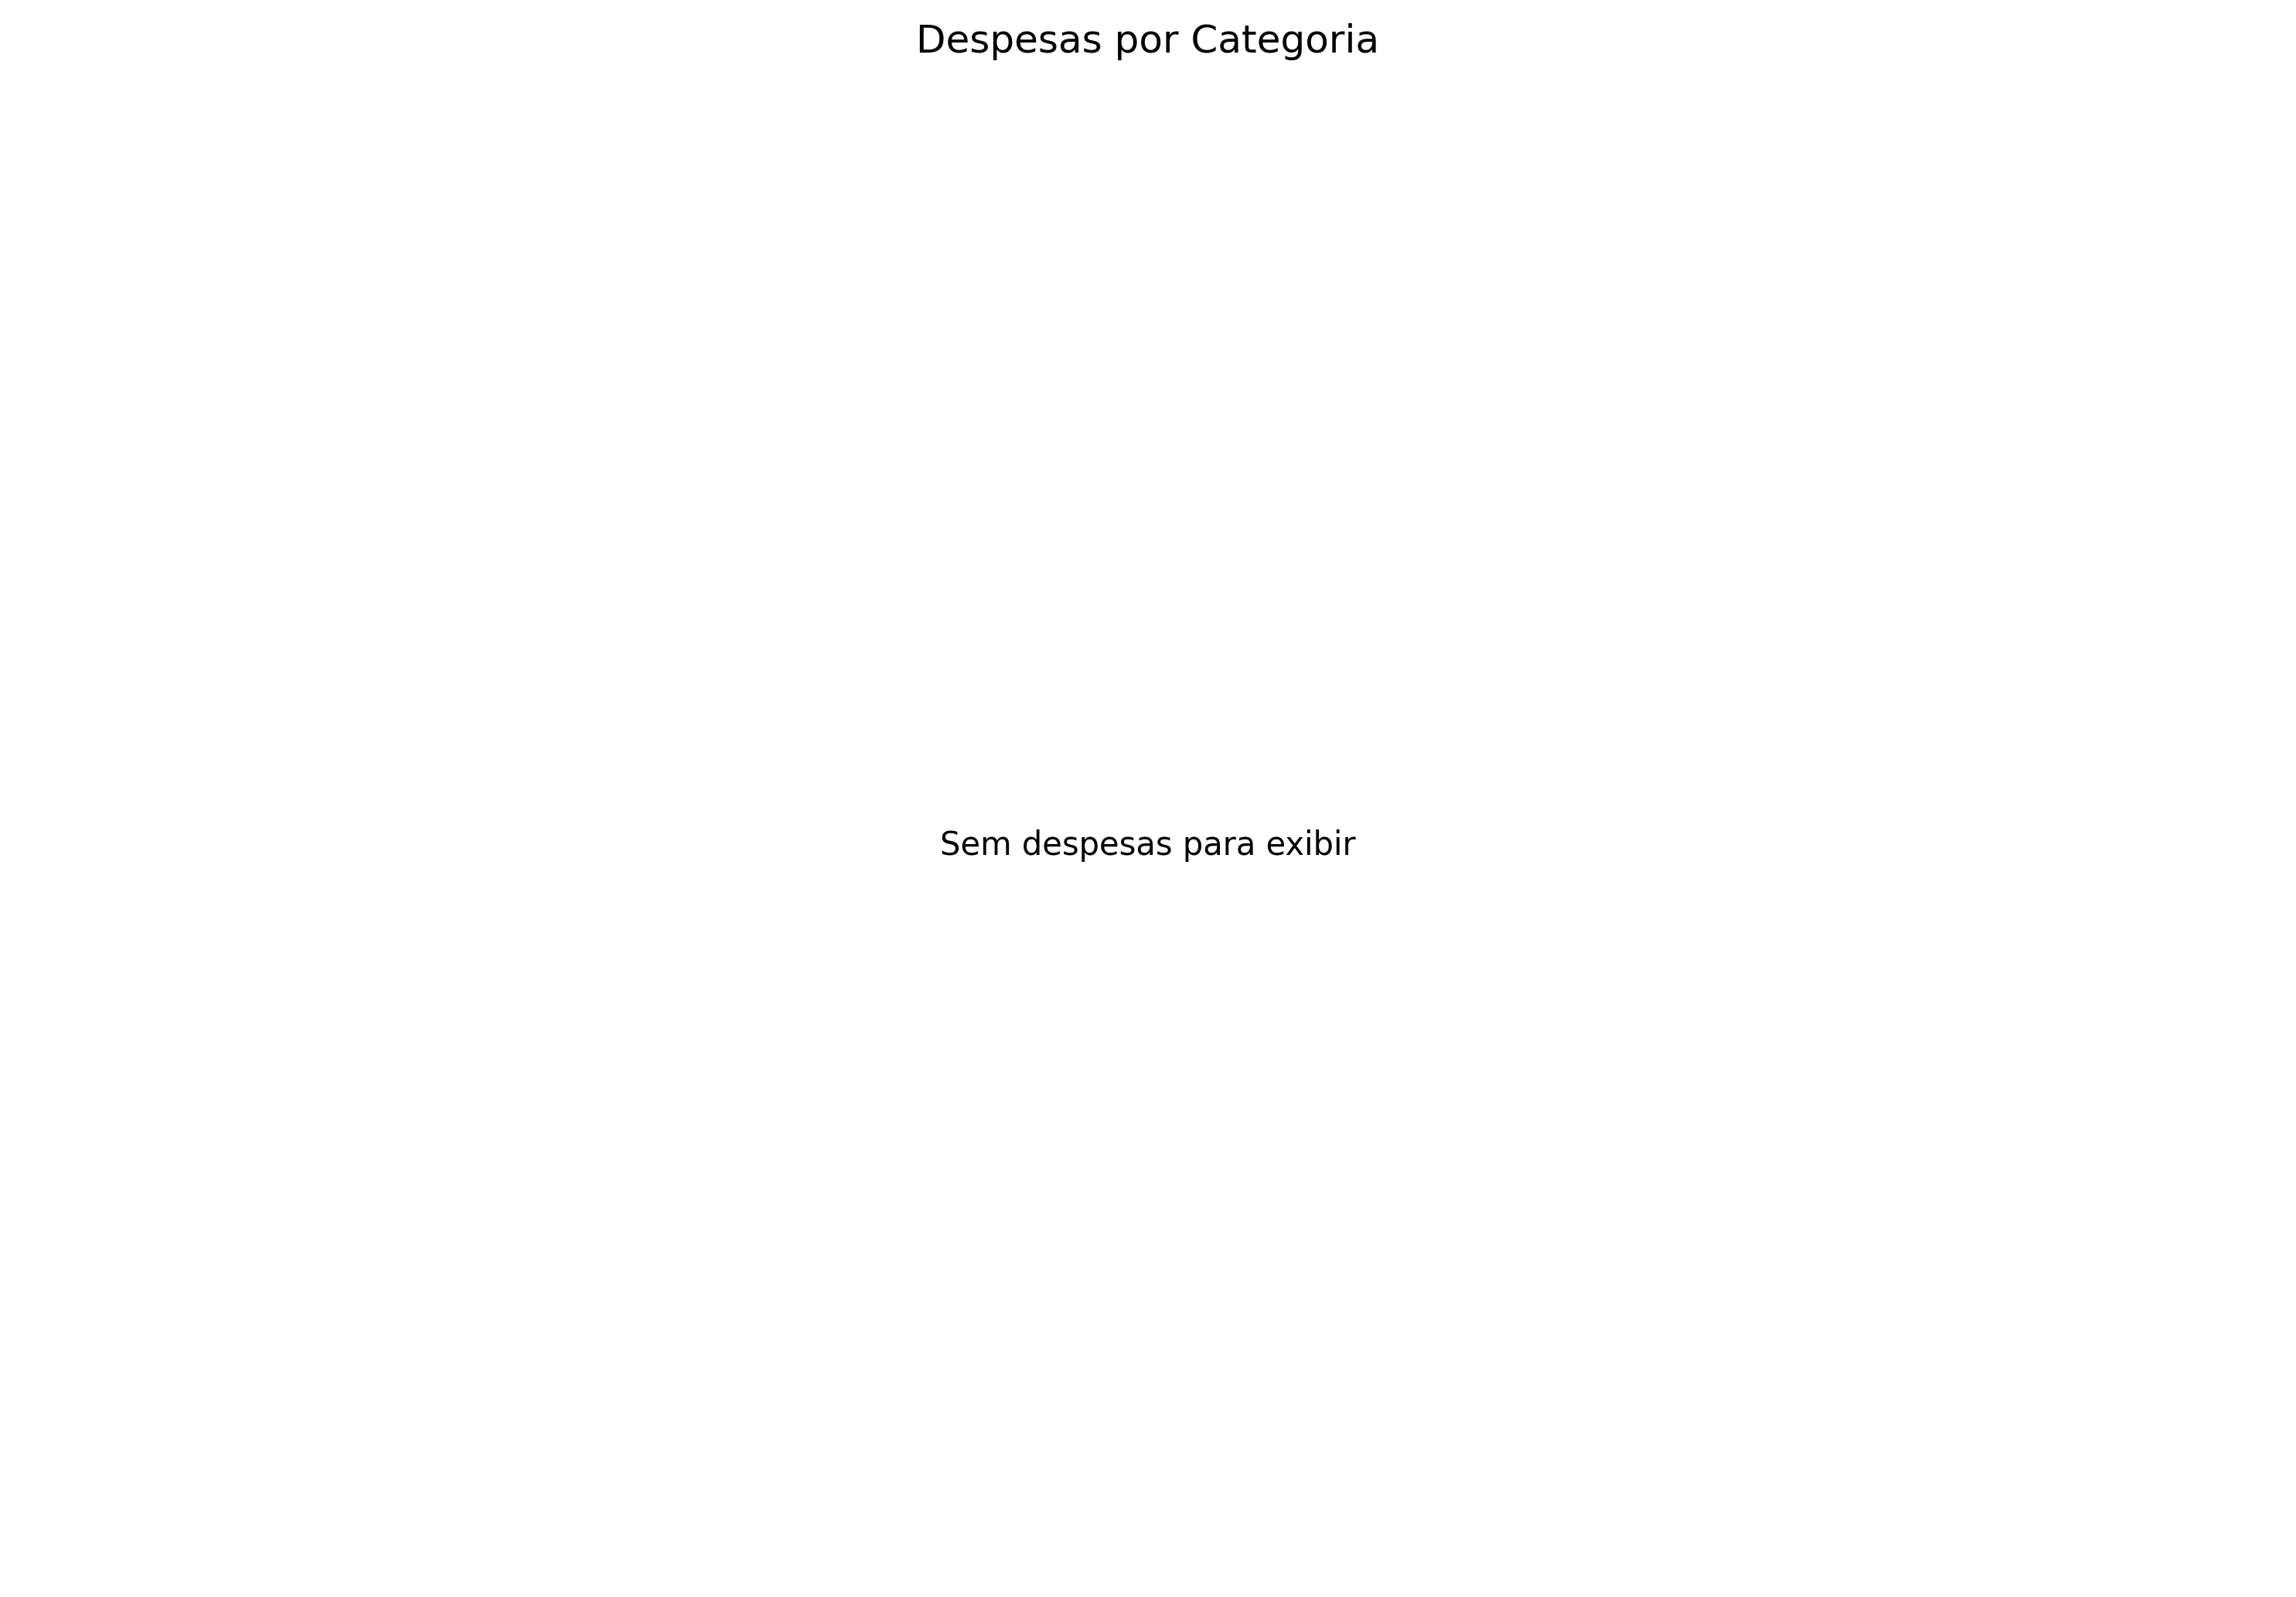

In [20]:
from IPython.display import Image, display

display(Image('graphs/gastos_por_categoria.png'))
display(Image('graphs/despesas_categoria.png'))


In [21]:
print(df.head())
print(df['amount'].describe())
print("Quantidade de despesas:", (df['amount'] < 0).sum())


         Data                   title  amount   Categoria
0  2025-06-11              Uber* Trip    9.74  Transporte
1  2025-06-10            99app *99app   12.40  Transporte
2  2025-06-09  Uber Uber *Trip Help.U   31.42  Transporte
3  2025-06-08              Uber* Trip    8.46  Transporte
4  2025-06-08  Uber Uber *Trip Help.U   15.22  Transporte
count     49.000000
mean      -0.655102
std      110.032322
min     -744.020000
25%        9.670000
50%       11.500000
75%       21.250000
max       75.000000
Name: amount, dtype: float64
Quantidade de despesas: 3
